In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="5" color="red" >ch12_데이터 시각화</font></b>
- 시각화 라이브러리 : matplotlib, seaborn(데이터시각화), folium(지도시각화)
    * matplotlib : 파이썬에서 가장 쉽게 많이 사용하는 시각화 라이브러리. 판다스 내부에 포함
    * seaborn : matplot 기반으로 다양한 색상, 테마, 차트 기능과 groupby 기능 포함된 라이브러리
# 2절 seaborn
- https://pypi.org/project/matplotlib/
- https://matplotlib.org/stable/api/index
- seaborn 으로 그래프 그리기 위해 다음 단계를 따릅니다.
    1. 데이터 준비
    2. 미적 속성 설정(한글 설정을 다시)
    3. 함수를 이용해서 그래프 그리기(수치형, 범주형, 쌍관계, 밀도, 회귀, 다중)
    4. 그래프 출력(show), 저장(savefig)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%config InlineBackend.figure_format = 'retina'
# 한글설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes',unicode_minus=False) # 축의 - 깨짐 방지
# plt.rcParams['font.family'] = 'Malgun Gothic'

 
# warning(경고) 안보이게

In [5]:
sns.__version__

'0.12.2'

## 2.1 데이터 준비하기
- iris, titanic

In [7]:
iris = sns.load_dataset('iris')
iris.shape

(150, 5)

In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
iris.species.unique() # 범주형 데이터들의 종류

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [18]:
iris['species'].value_counts() # 범주별 데이터 갯수
# iris.groupby('species')['sepal_length'].count() # 결측치를 제외하고 보여줌

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [21]:
titanic = sns.load_dataset('titanic')
# Survived - 생존유무, target 값. (0 = 사망, 1 = 생존)
# Name - 탑승객 성명
# Pclass - 티켓 클래스. (1 = 1st, 2 = 2nd, 3 = 3rd)
# Sex - 성별
# Age - 나이(세)
# SibSp - 함께 탑승한 형제자매, 배우자 수 총합
# Parch - 함께 탑승한 부모, 자녀 수 총합
# Embarked - 탑승 항구
# Fare - 탑승 요금
# Ticket - 티켓 넘버
# Cabin - 객실 넘버

In [22]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [23]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## 2.2 미적속성 설정하기(style, context, palette, figsize..)
### 1) 그래프 style 설정
- https://seaborn.pydata.org/generated/seaborn.axes_style.html#seaborn.axes_style (51p.)
### 범례표시
- 범례사용 : https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

Text(0.5, 0, '꽃잎 길이')

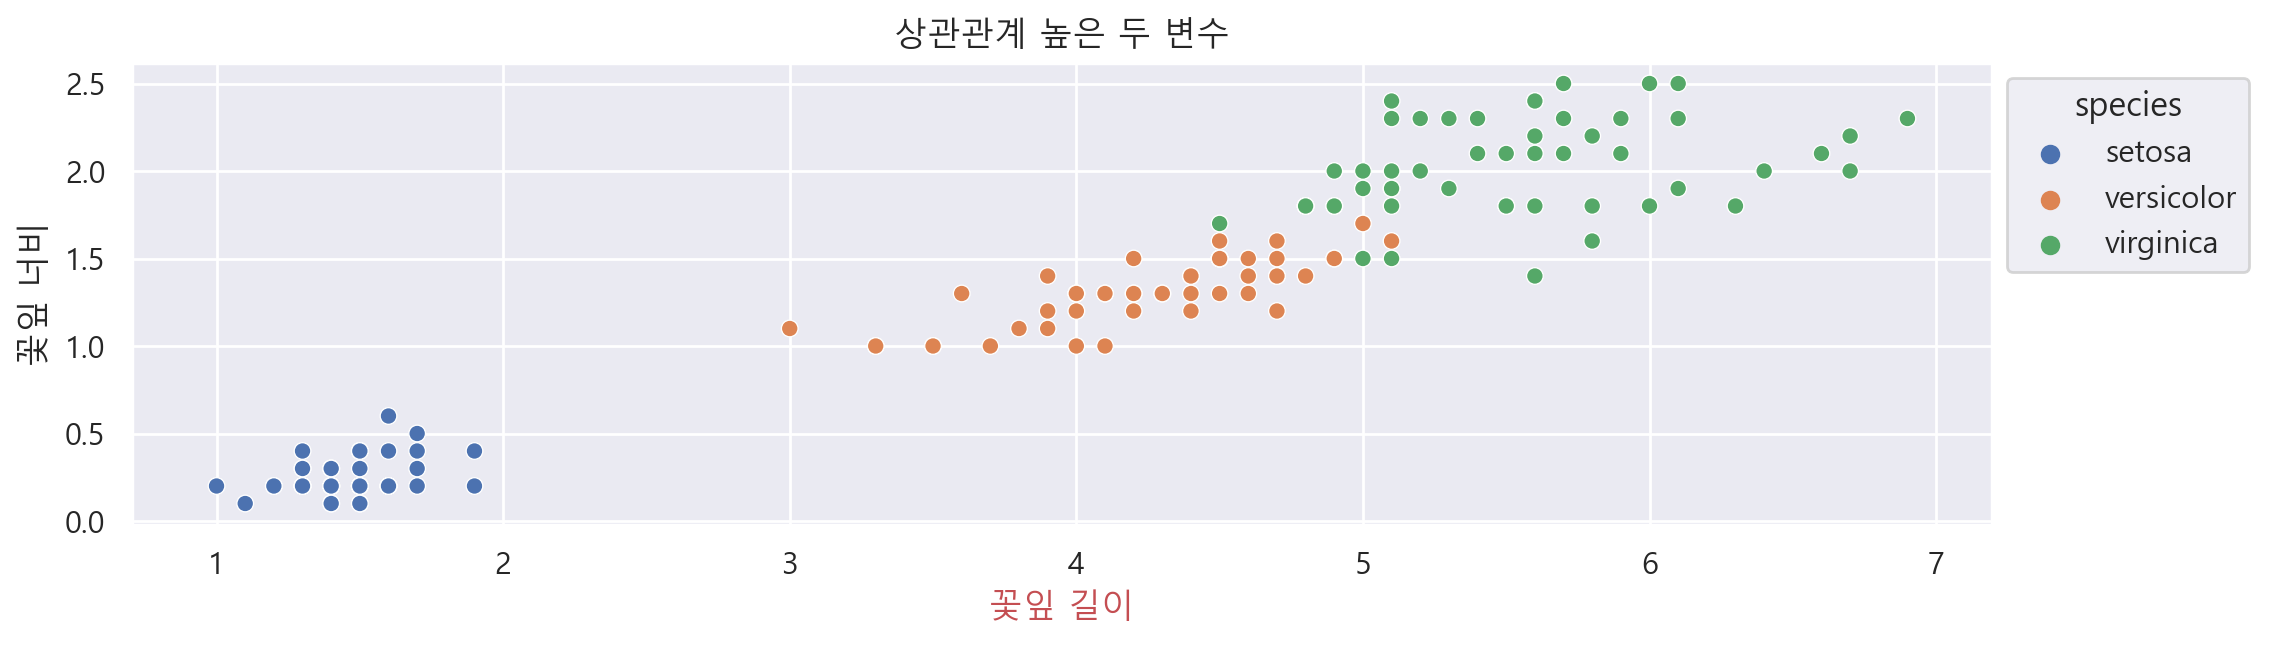

In [37]:
plt.figure(figsize=(12,3))
sns.set(style='darkgrid') # white, whitegrid, dark, darkgrid, ticks
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes',unicode_minus=False) # 축의 - 깨짐 방지

ax = sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set(title='상관관계 높은 두 변수',
       ylabel='꽃잎 너비')
ax.set_xlabel('꽃잎 길이', color='r')

### 2) 컨텍스트 지정(비율)

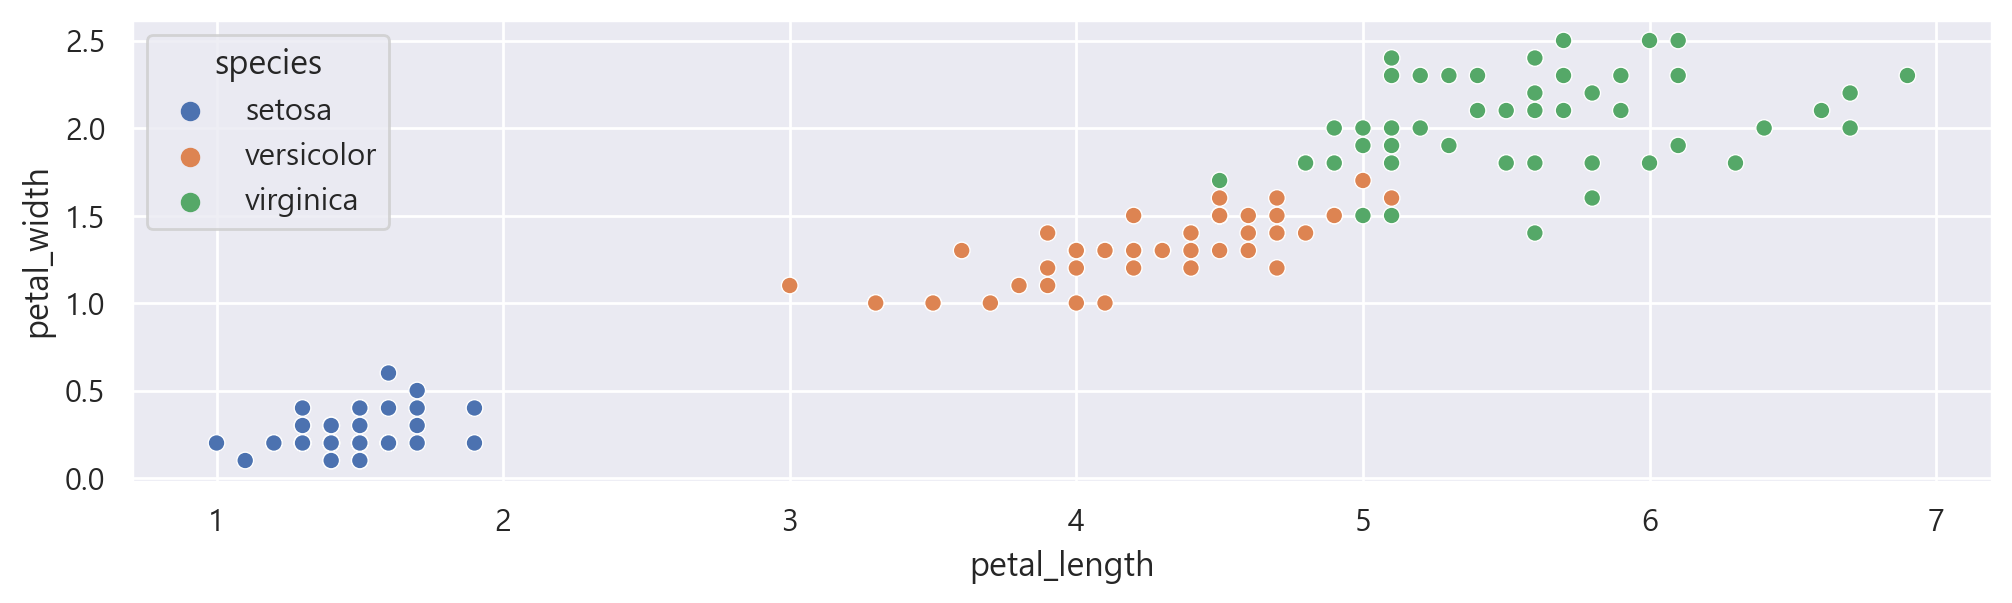

In [ ]:
plt.figure(figsize=(12,3))
sns.set(context='notebook') # notebook(1.0), paper(0.8), talk(1.3), poster(1.8)

plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes',unicode_minus=False) # 축의 - 깨짐 방지

ax = sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')
plt.show()

### 3) 컬레 팔레트
- https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
- https://matplotlib.org/tutorials/colors/colormaps.html
- https://seaborn.pydata.org/tutorial/color_palettes.html

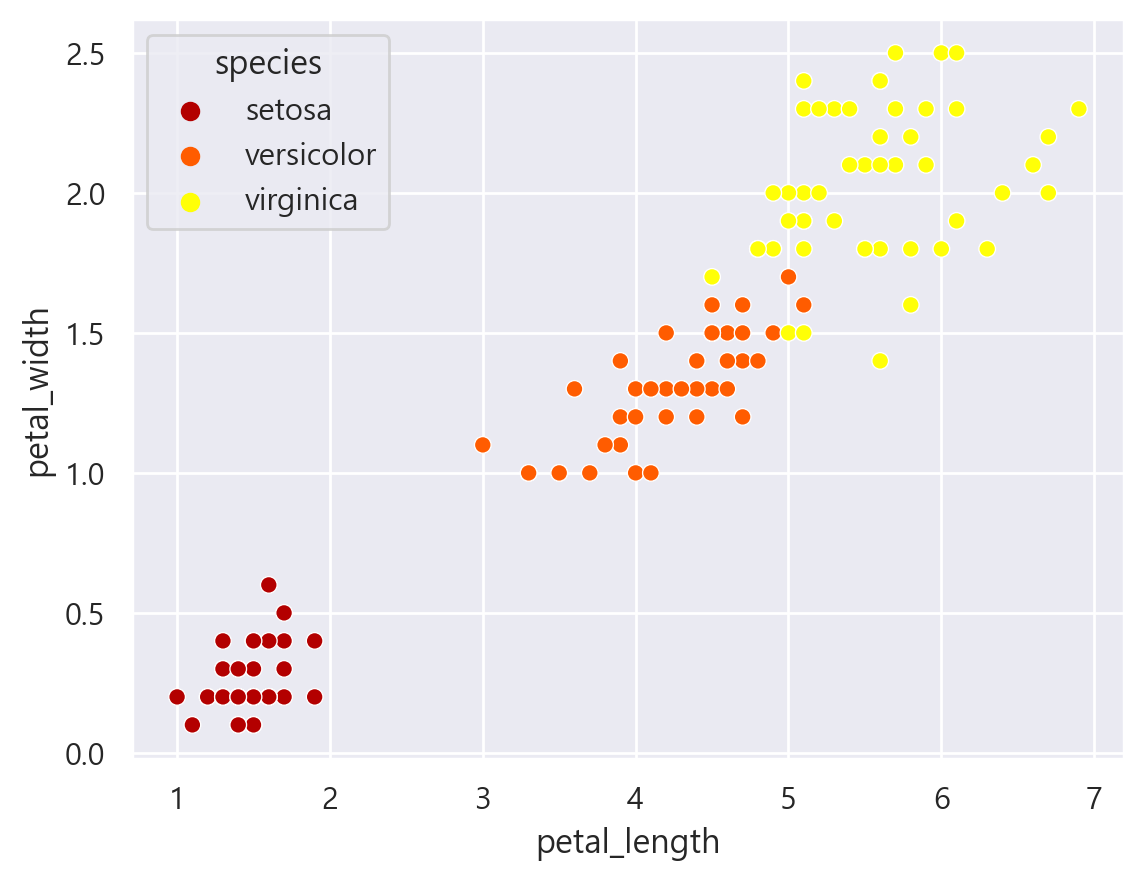

In [48]:
sns.set(palette='tab10', style='darkgrid', context='notebook') # 기본속성
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes',unicode_minus=False) # 축의 - 깨짐 방지
sns.scatterplot(data=iris, x='petal_length', y='petal_width',
                hue='species',
                palette='hot')
ax.set_title('붓꽃 데이터')
plt.show()

In [51]:
sns.set(palette='tab10',
        style='darkgrid',
        context='notebook',
        rc={'figure.figsize':(10,3)}) # 기본 미적 속성 설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes',unicode_minus=False) # 축의 - 깨짐 방지


## 2.3 Seaborn 함수로 그래프 그리기
### 1)관계형 그래프
    - x축이 수치형 데이터
    (ex) scatterplot, lineplot => relplot(서브플롯)

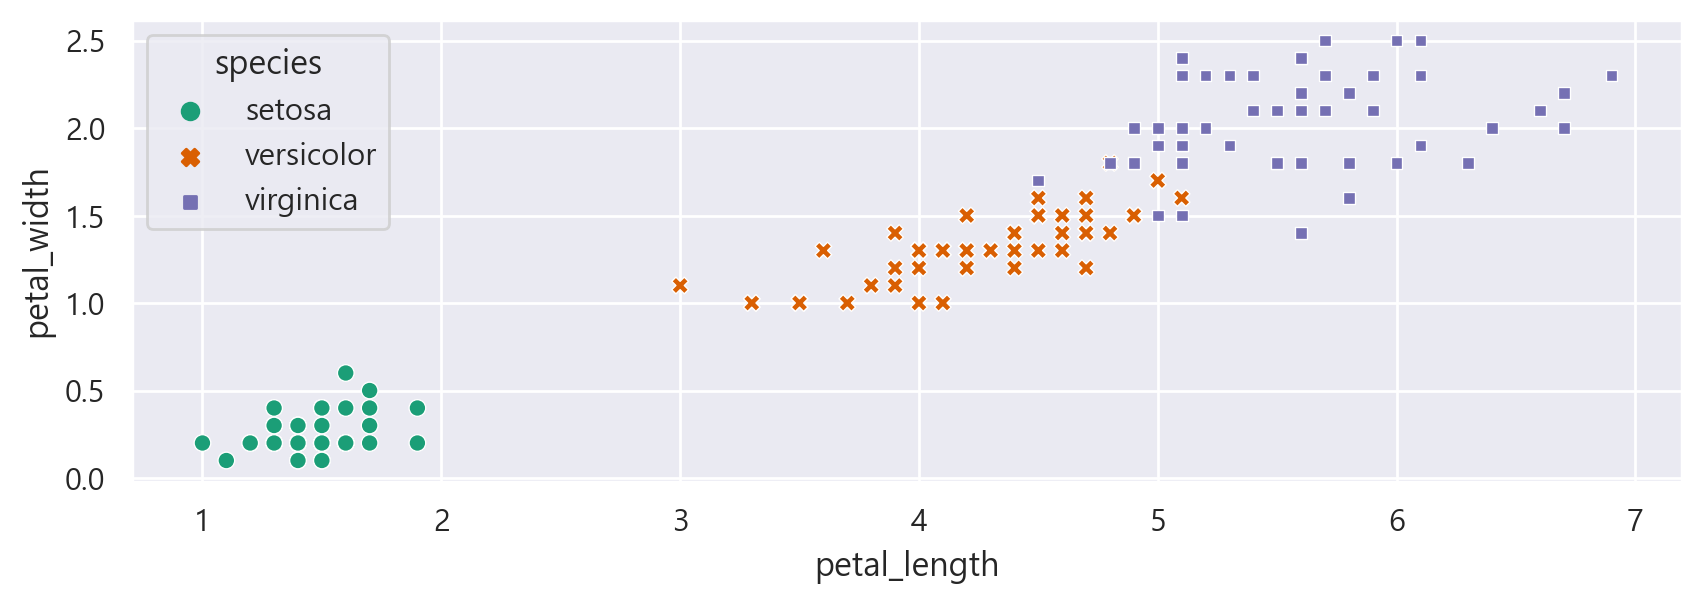

In [54]:
sns.scatterplot(data=iris, x= 'petal_length', y='petal_width', hue='species',
                palette='Dark2', style='species')
        # species별 색상과 스타일이 다른 scatterplot
plt.show()

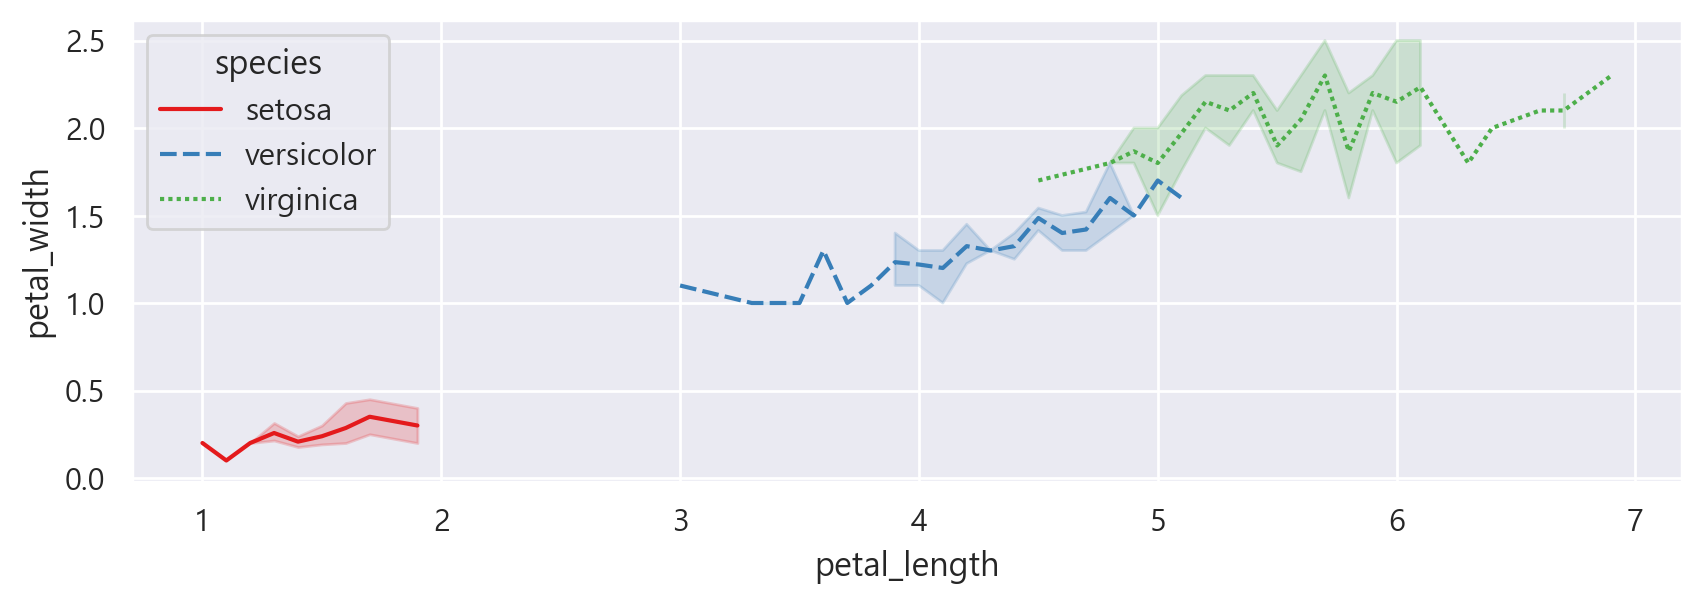

In [ ]:
# 종별 lineplot
# lineplot의 음영 : 95% 신뢰구간
sns.lineplot(data=iris, x='petal_length', y='petal_width',
             hue='species', palette='Set1', style='species')
plt.show()

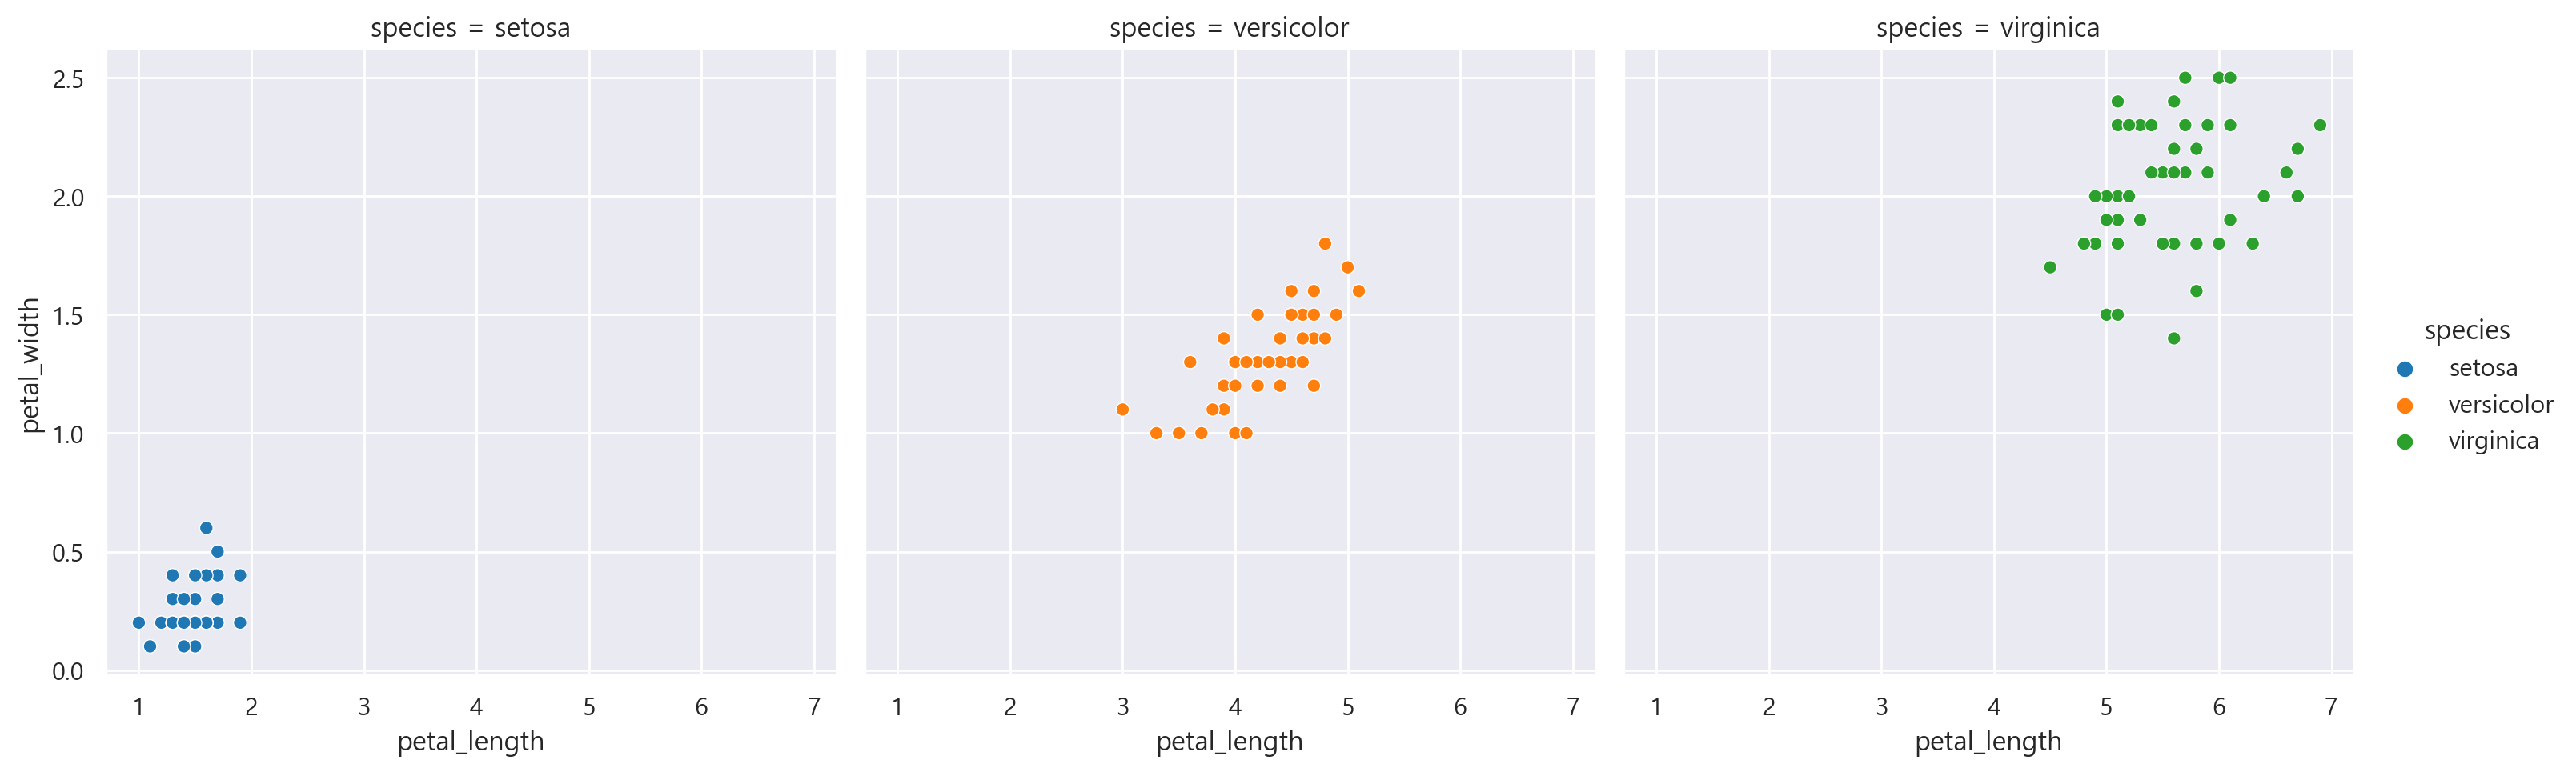

In [69]:
# 종별 lineplot을 서브플롯으로
sns.relplot(data=iris, x='petal_length', y='petal_width',
            hue='species',
            # kind='line', # kind='scatter'가 기본값
            col='species', # species 별 서브플롯
            # col_wrap=2, # 한줄에 표현될 서브플롯 수
            )
plt.show()

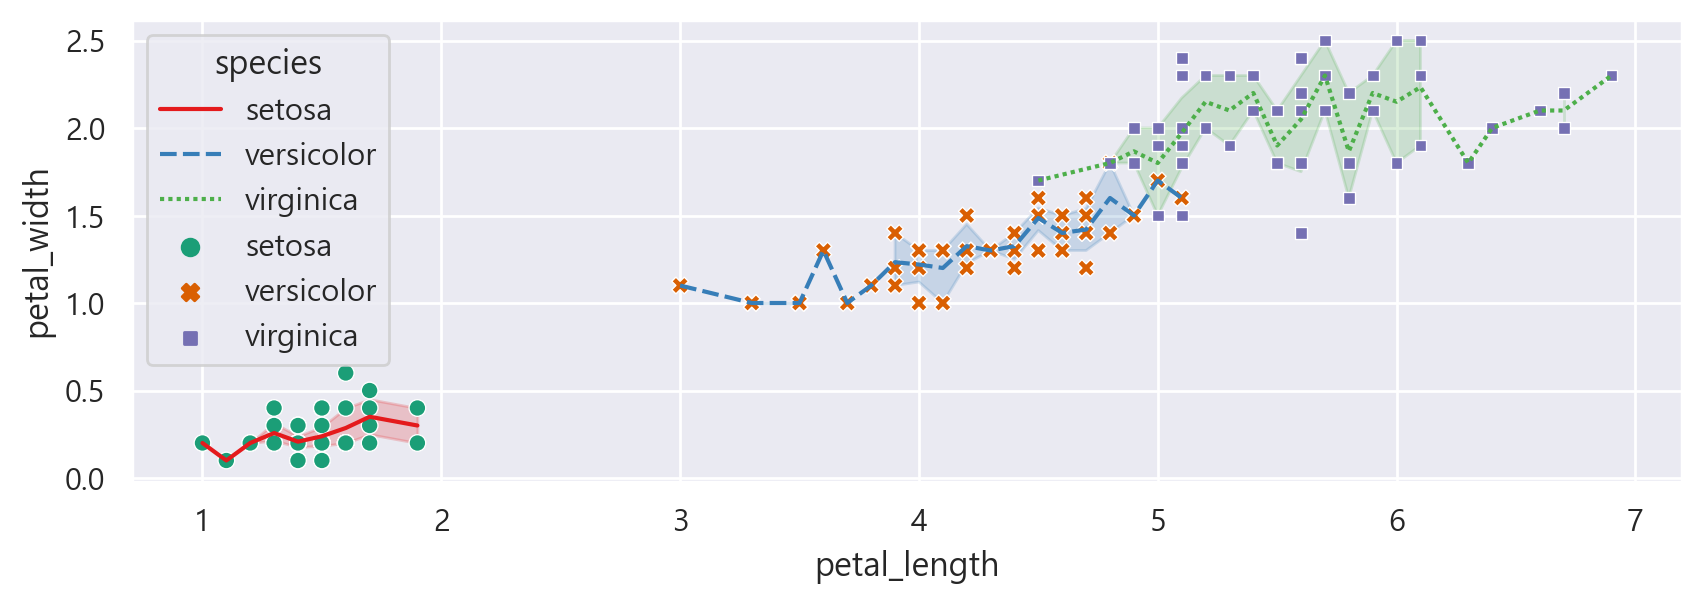

In [73]:
# scatter와 line을 겹쳐서
sns.lineplot(data=iris, x='petal_length', y='petal_width',
             hue='species', palette='Set1', style='species')

sns.scatterplot(data=iris, x= 'petal_length', y='petal_width', hue='species',
                palette='Dark2', style='species')
plt.show()

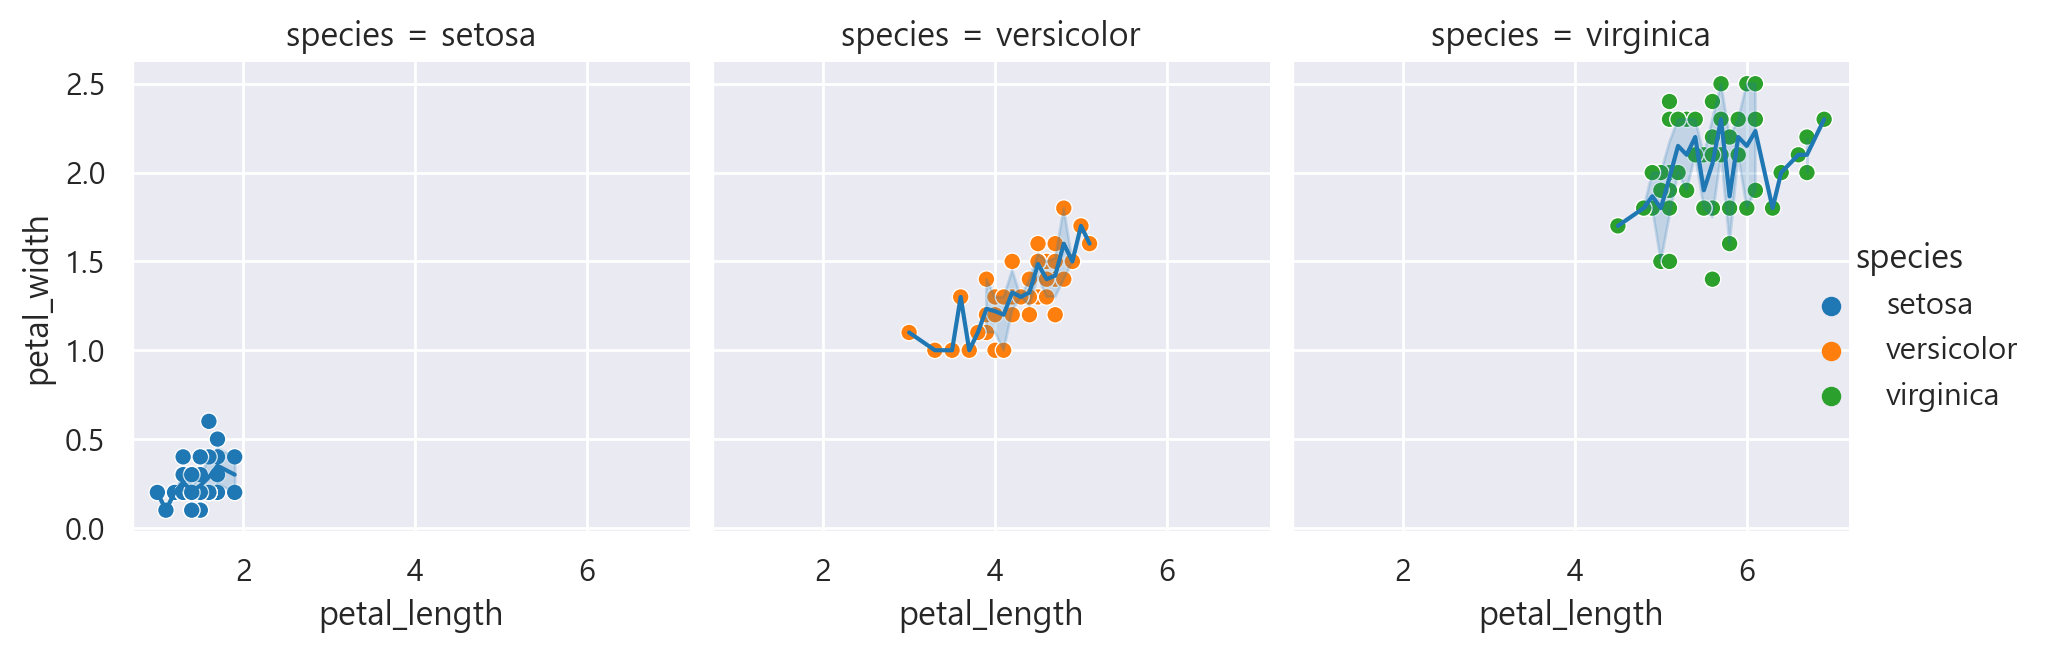

In [ ]:
# line 과 scatter를 종별 서브플롯으로 겹쳐서
g = sns.relplot(data=iris, x='petal_length', y='petal_width',
            hue='species',
            # kind='line', # kind='scatter'가 기본값
            col='species', # species 별 서브플롯
            # col_wrap=2, # 한줄에 표현될 서브플롯 
            )
# g그래프에 line 플롯을 추가
g.map_dataframe(sns.lineplot, x='petal_length', y='petal_width')
# 크기 조정 : 서브플롯함수에서는 내부적으로 figure 새로 만들기 때문에 figsize 무시
g.fig.set_size_inches(10,3)

<Axes: xlabel='petal_length', ylabel='petal_width'>

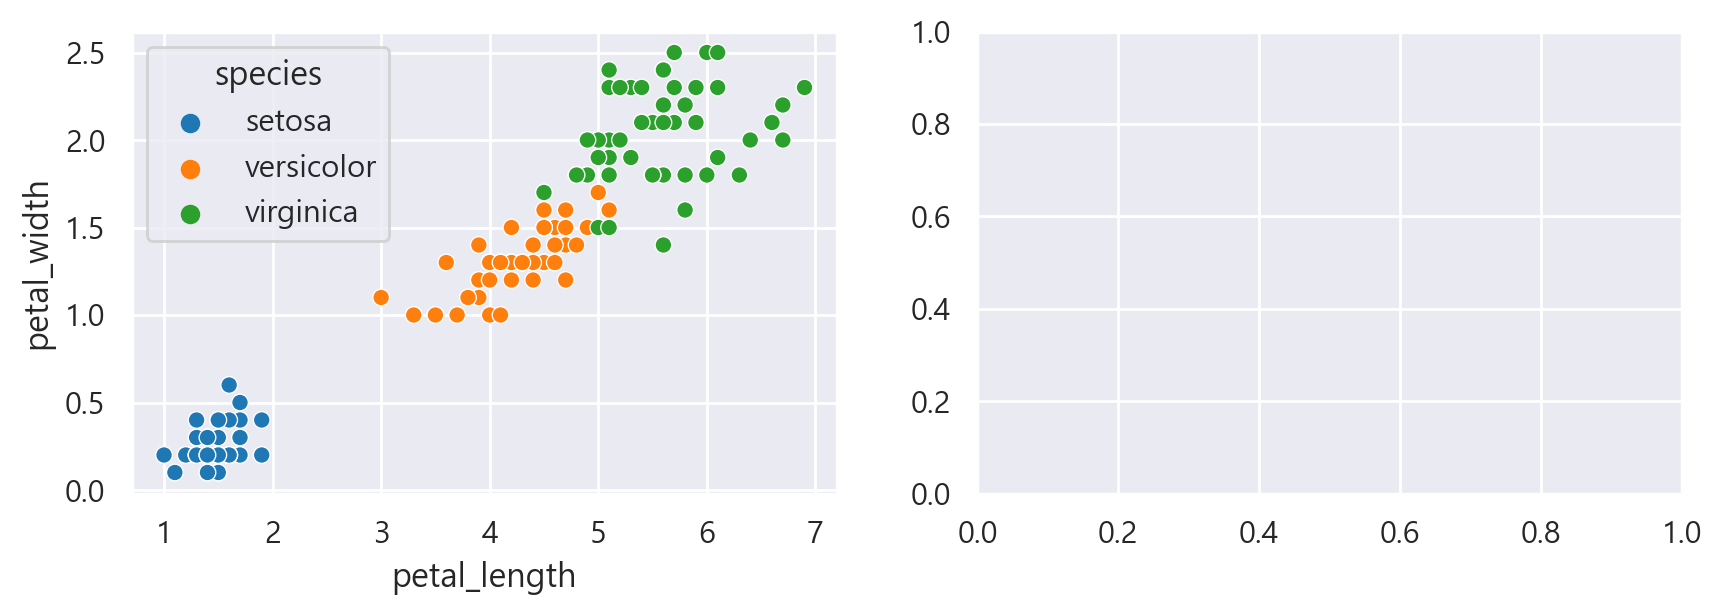

In [ ]:
# ax[0]에는 scatter, ax[1] lineplot
fig, ax = plt.subplots(1, ncols=2)
sns.scatterplot(data=iris,
                 x='petal_length',
                   y='petal_width',
                     hue='species',
                       ax=ax[0])

### 2) 범주형 그래프
    - x축이 범주형 데이터
(ex) stripplot(무작위 흩뿌림), swarmplot(겹치치 않는 산점도)
     barplot, barhplot(y의 평균으로 막대그래프), pointplot(y의 평균으로 line을 그림)
     countplot(count는 x의 빈도수가 높이)
     boxplot, violinplot, boxenplot
     => catplot(서블플롯)

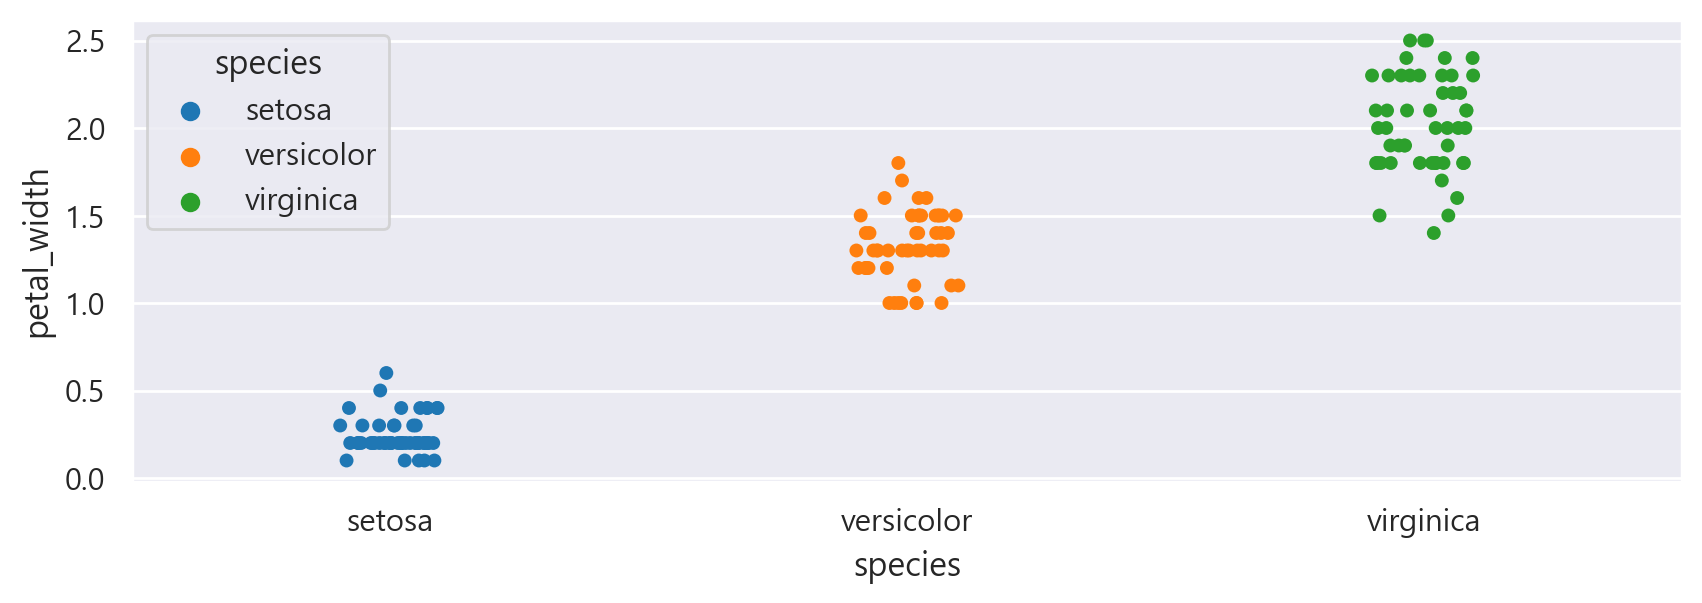

In [92]:
# x축이 범주형일 때의 산점도
sns.stripplot(data=iris, x='species', y='petal_width', hue='species')
plt.show()

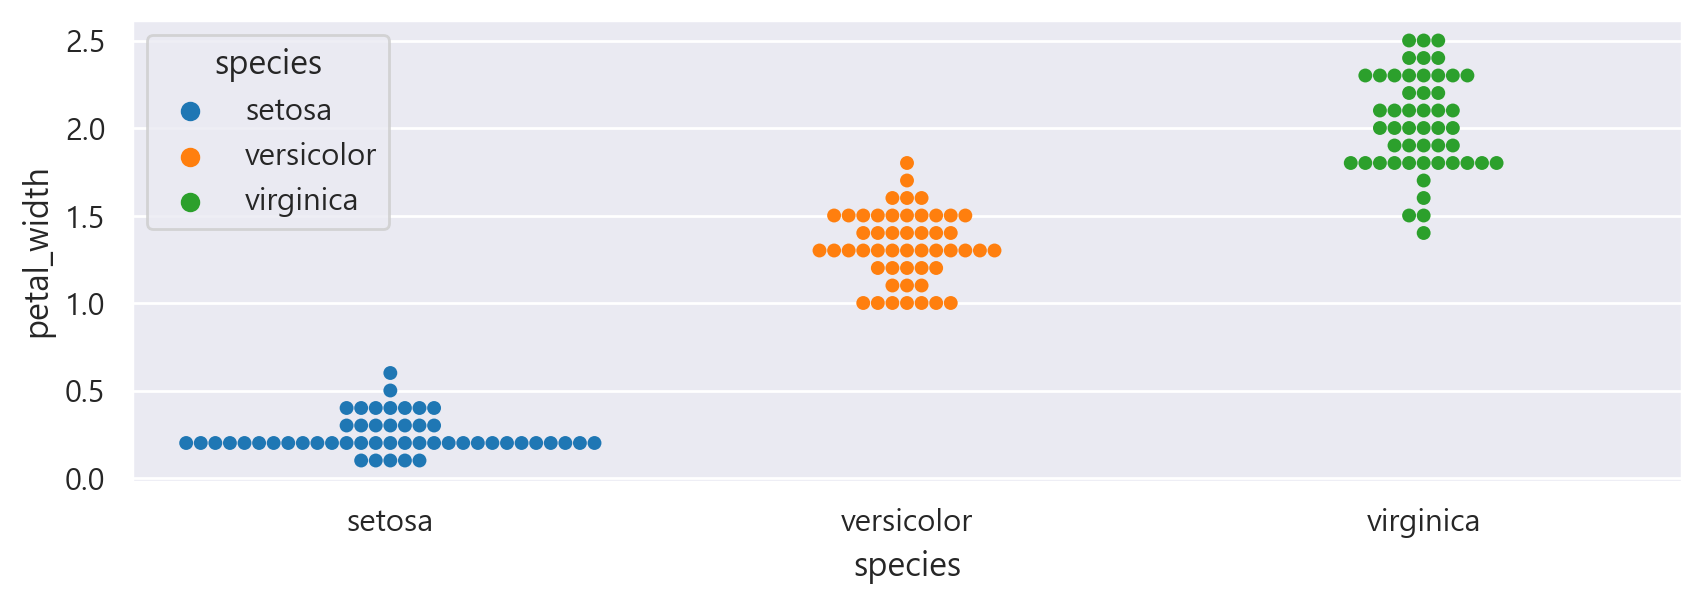

In [94]:
# x축이 범주형일 때의 산점도
sns.swarmplot(data=iris, x='species', y='petal_width', hue='species')
plt.show()

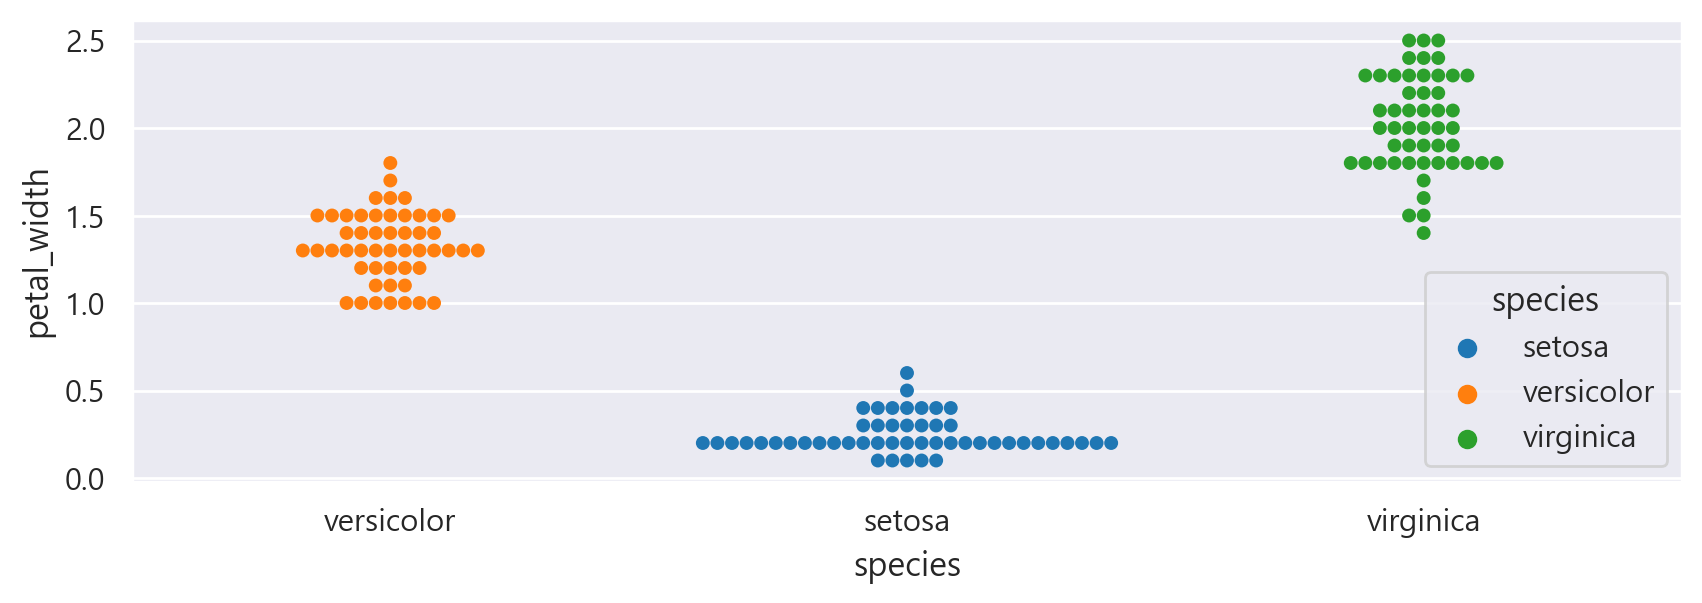

In [96]:
# 범주형 그래프의 x축을 지정하지 않으면
sns.swarmplot(data=iris,
              x='species',
              y='petal_width',
              hue='species',
              order=['versicolor','setosa','virginica'])
plt.show()

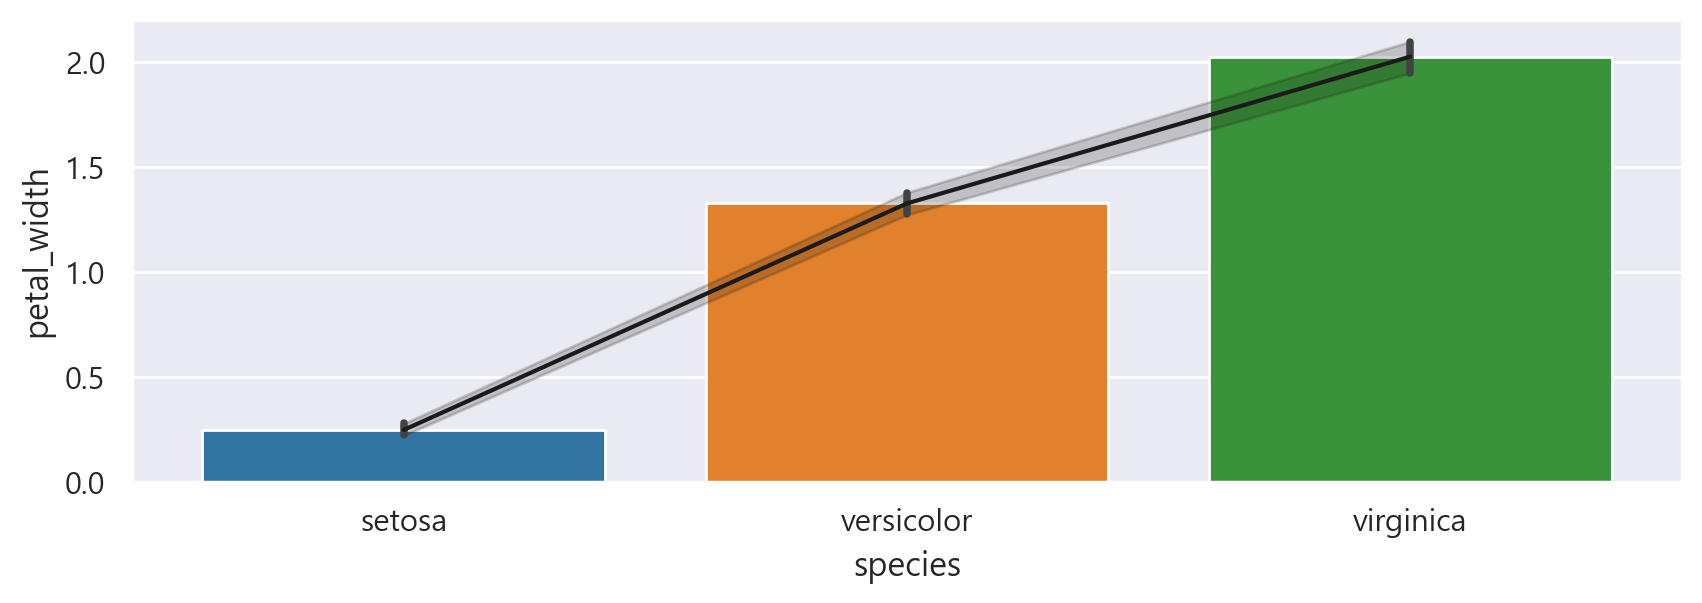

In [102]:
# barplot, barhplot, pointplot : 각 범주별 평균값
sns.barplot(data=iris, x='species', y='petal_width',
            # errorbar=None,
            )
sns.lineplot(data=iris,  x='species', y='petal_width', color='k')
plt.show()

<Axes: xlabel='species', ylabel='petal_width'>

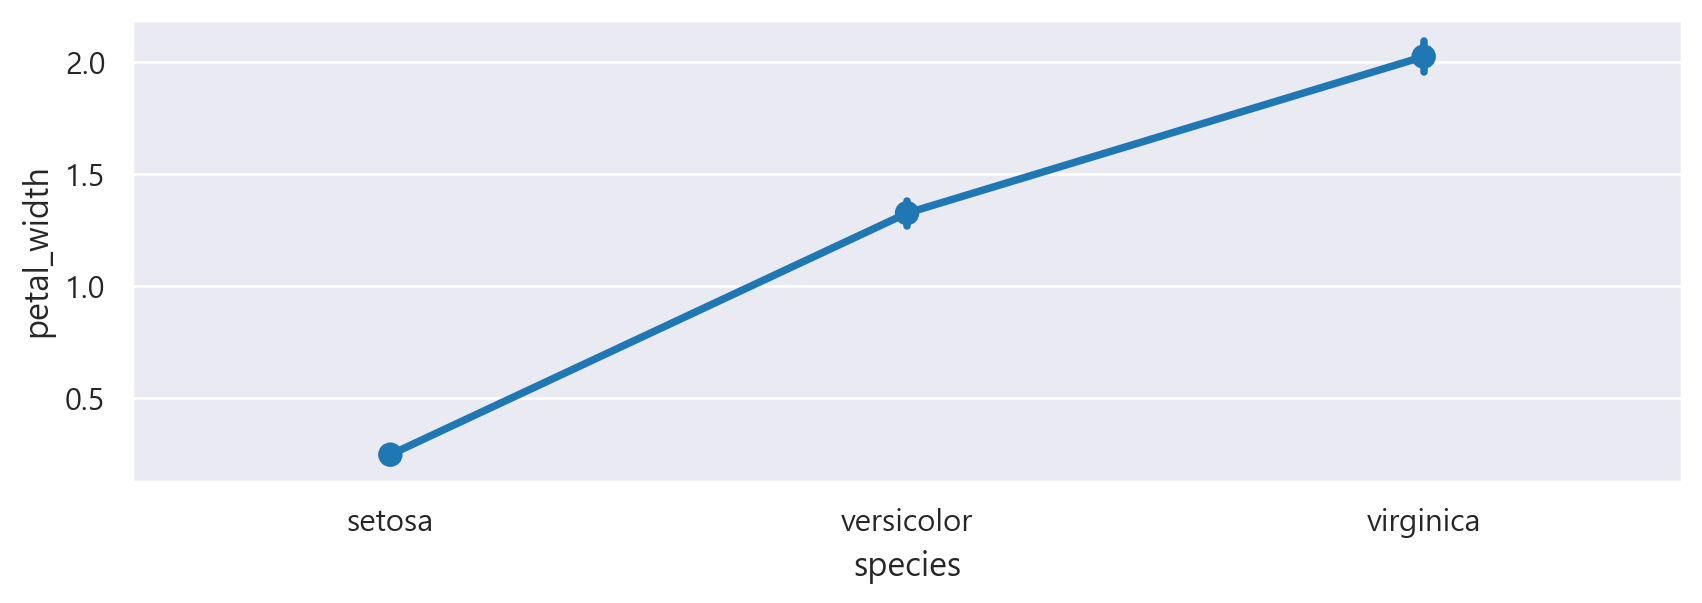

In [105]:
sns.pointplot(data=iris, x='species', y='petal_width') # 신뢰구간을 제외

<Axes: xlabel='sex', ylabel='survived'>

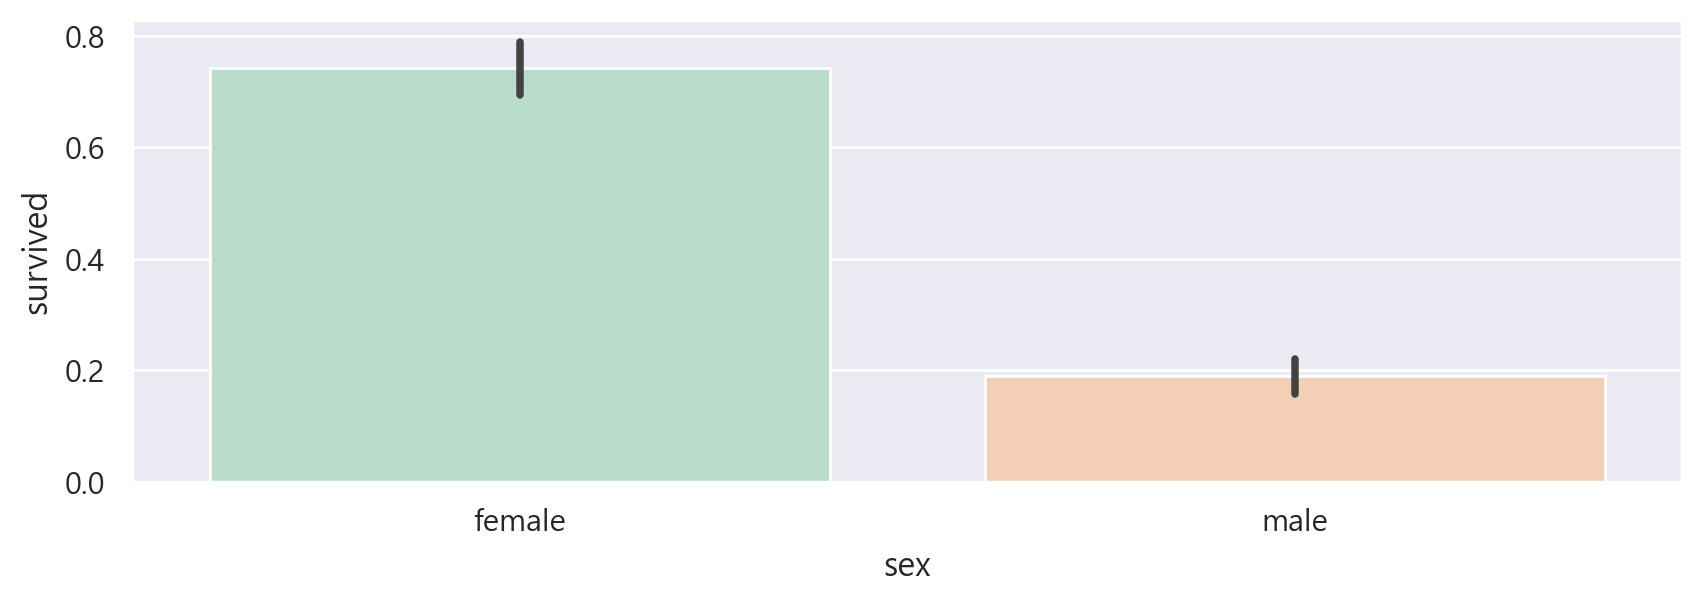

In [107]:
# 성별 생존율을 막대그래프
sns.barplot(data=titanic,
            x='sex',
            y='survived',
            order=['female','male'],
            palette='Pastel2')

In [109]:
titanic.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [115]:
# 남자중 비생존자
len(titanic[(titanic.sex=='male') & (titanic.survived==0)])

468

In [116]:
# 남자중 생존자
len(titanic[(titanic.sex=='male') & (titanic.survived==1)])

109

In [117]:
# 여자중 비생존자
len(titanic[(titanic.sex=='female') & (titanic.survived==0)])

81

In [118]:
# 여자중 생존자
len(titanic[(titanic.sex=='female') & (titanic.survived==1)])

233

In [120]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

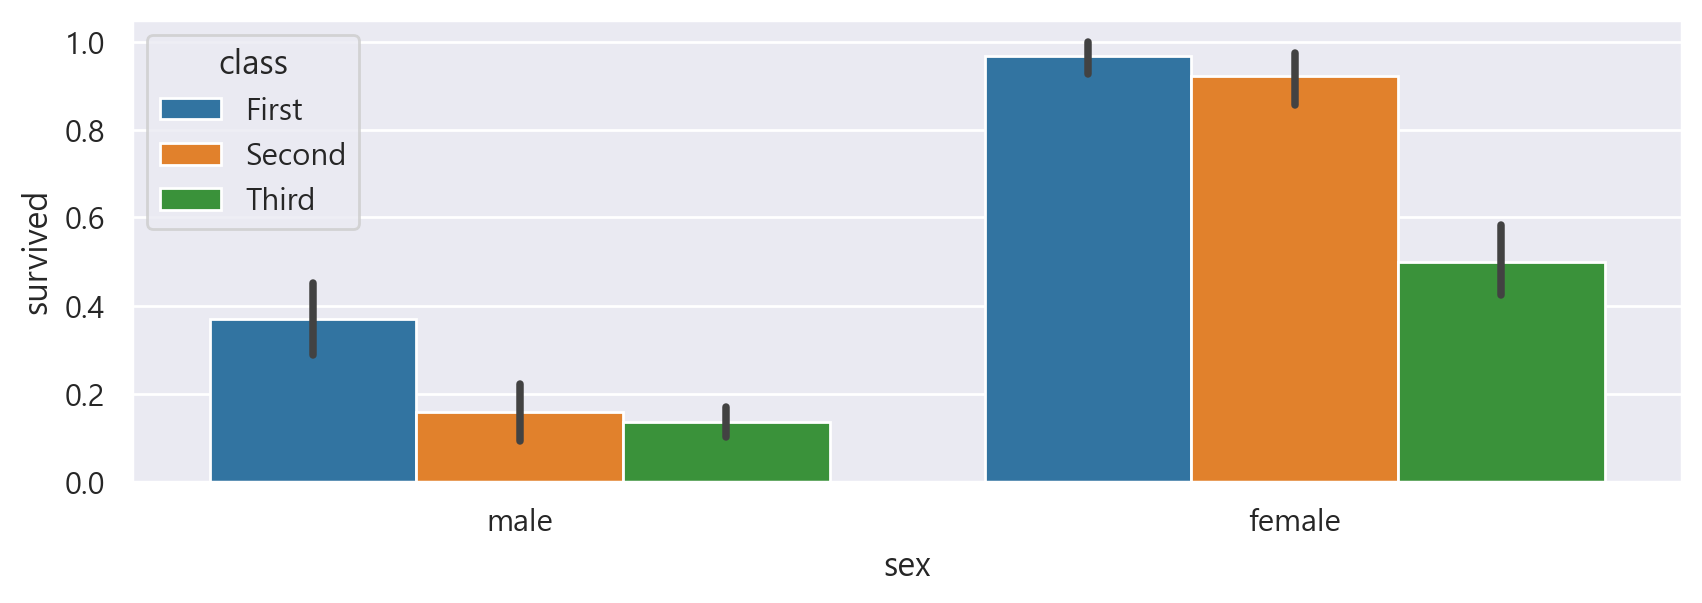

In [121]:
# class별 생존율 hue = 'class'
sns.barplot(data=titanic, x='sex', y='survived', hue='class')
plt.show()

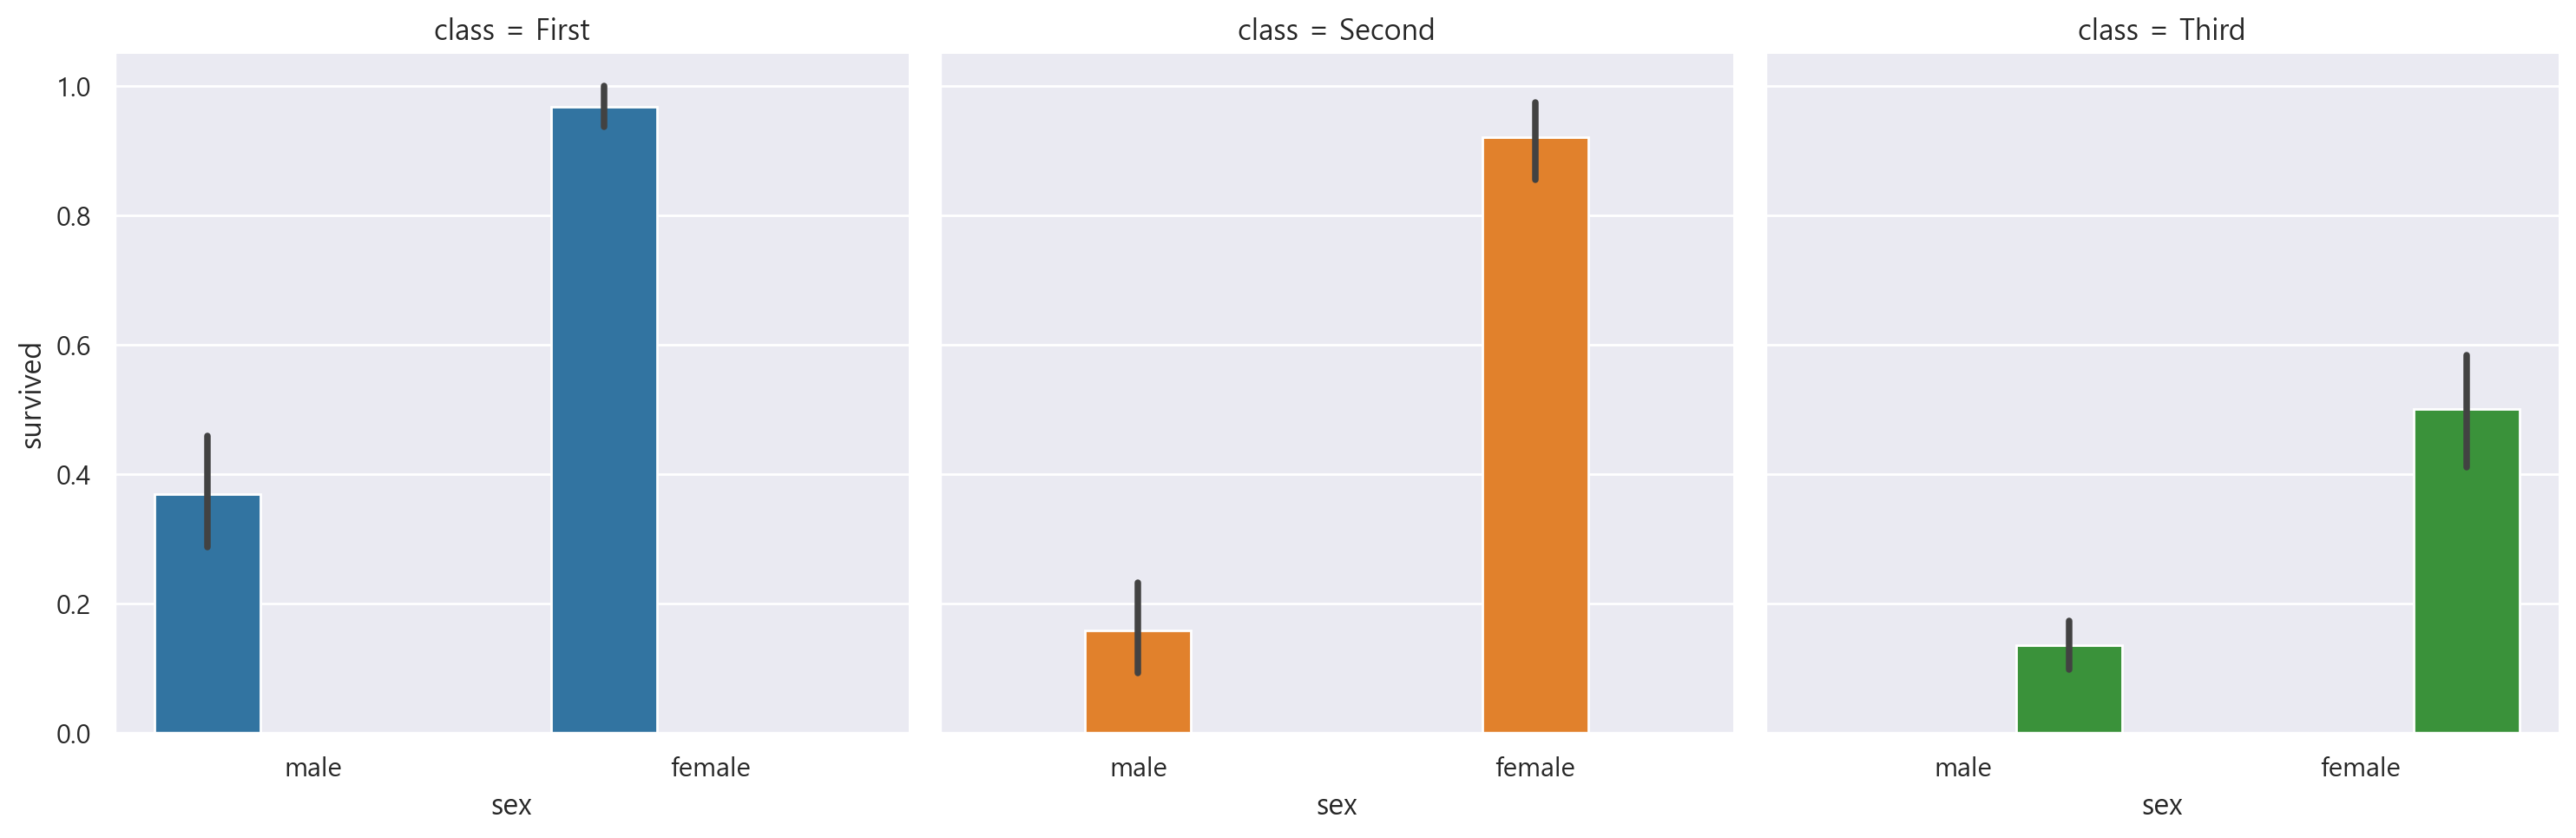

In [ ]:
# class 별로 성별생존율을 서브플롯으로(막대그래프)
sns.catplot(data=titanic,
            x='sex',
            y='survived',
            hue='class',
            kind='bar', # 기본값은 stripplot
            col='class',
            # col_wrap=2, # 한행에 그려질 서브플롯 갯수, 기본값은 n
            )

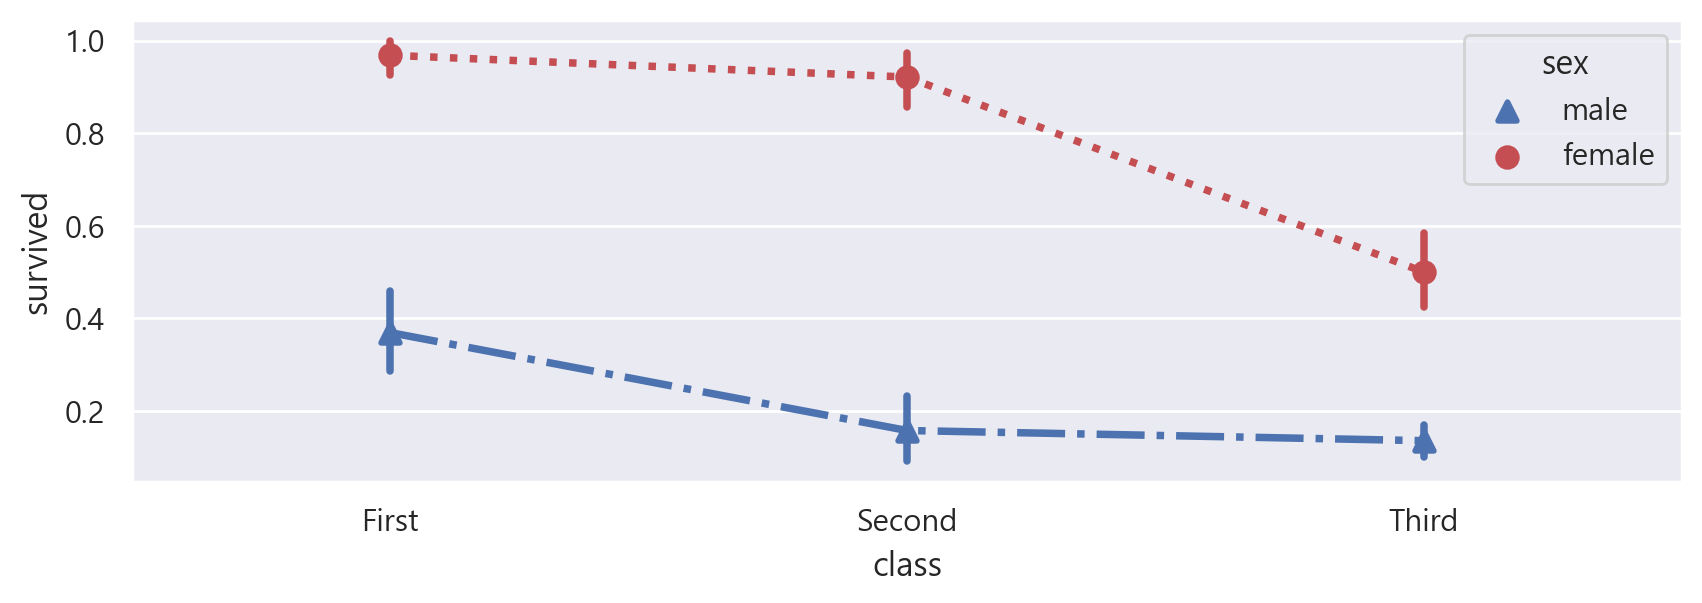

In [126]:
# 성별 생존율 hue='class'
sns.pointplot(data=titanic,
              x='class',
              y='survived',
              hue='sex',
              markers=['^','o'],
              linestyles=['-.',':'],
              palette={'male':'b', 'female':'r'})
plt.show()

In [129]:
print('deck 전체 데이터 갯수 :{}, 결측치 갯수 : {}'.format(len(titanic), 
                                             titanic.deck.isna().sum()))

deck 전체 데이터 갯수 :891, 결측치 갯수 : 688


In [132]:
totallen = len(titanic)
nanlen = titanic.deck.isna().sum()
datalen = totallen - nanlen
print('전체 갯수 : {}, 결측치 갯수 : {}, 데이터 갯수 : {}'.format(totallen,
                                                                nanlen,
                                                                datalen))

전체 갯수 : 891, 결측치 갯수 : 688, 데이터 갯수 : 203


<Axes: xlabel='deck', ylabel='count'>

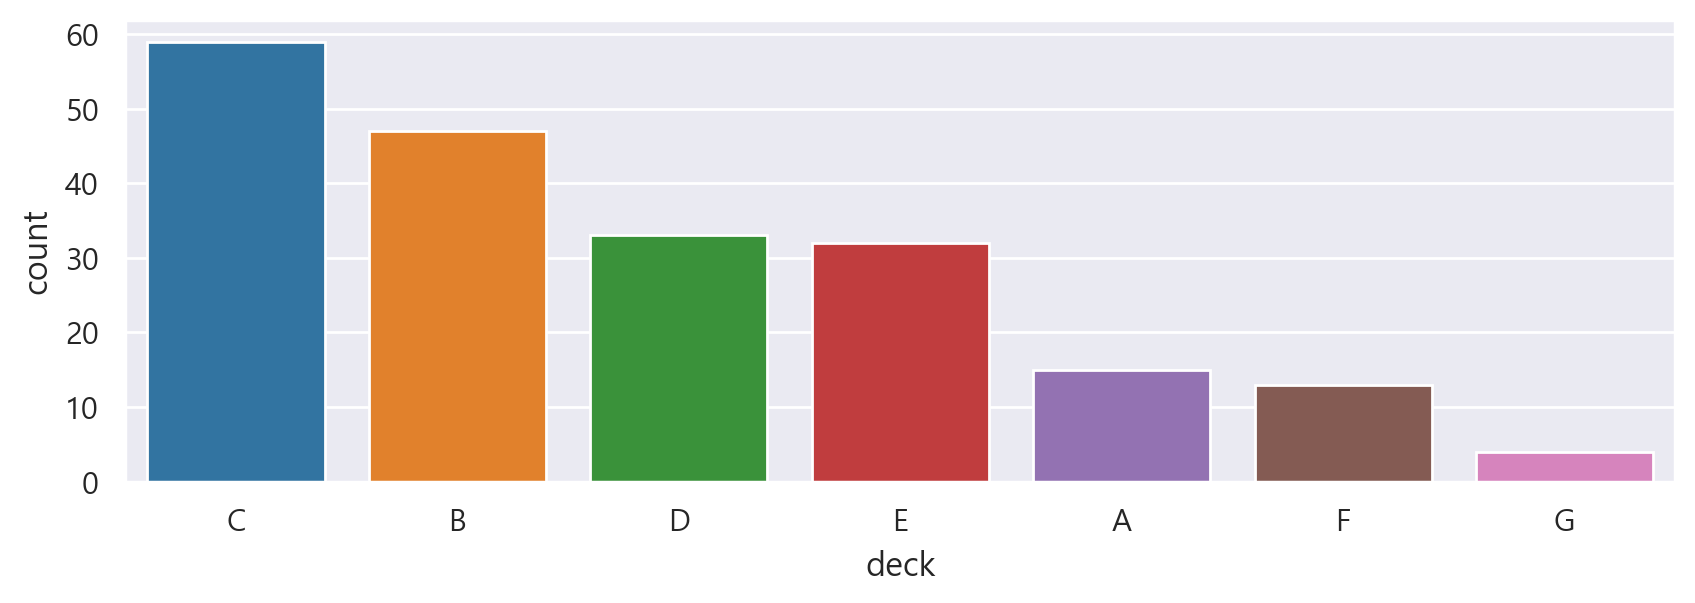

In [145]:
# deck별 갯수를 막대그래프(countplot)
sns.countplot(data=titanic,
              x='deck',
            #   order=['C','D','B','A'],
            order = deckcnt.index)

In [ ]:
deckcnt = titanic.deck.value_counts() # 범주별 데이터 갯수(정렬포함)
deckcnt.index # deckcnt.index가 count가 큰순

CategoricalIndex(['C', 'B', 'D', 'E', 'A', 'F', 'G'], categories=['A', 'B', 'C', 'D', 'E', 'F', 'G'], ordered=False, dtype='category')

<Axes: xlabel='sex', ylabel='age'>

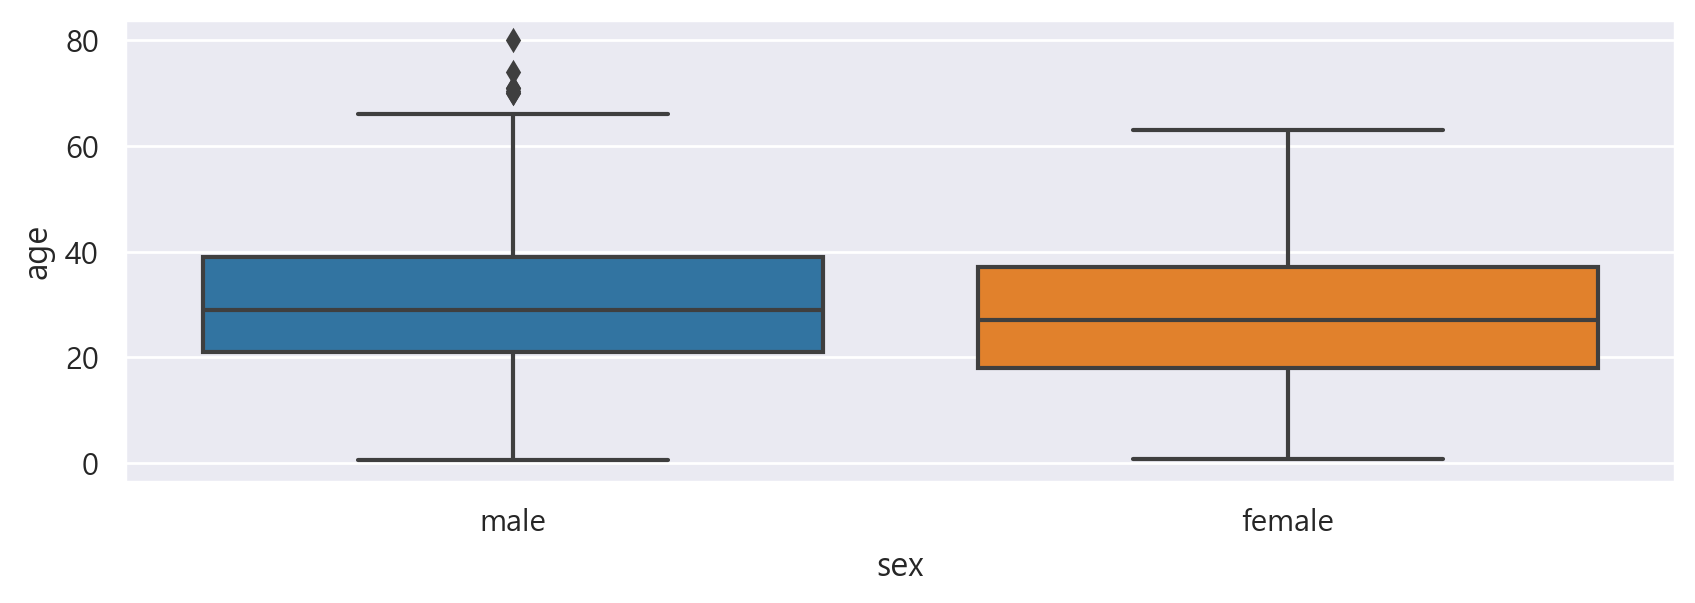

In [146]:
# boxplot
sns.boxplot(data=titanic, x='sex', y='age')